In [2]:
#Importing Libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
from tqdm import tqdm
from random import shuffle
from sklearn.model_selection import train_test_split

##Building Model
from keras import backend as K
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, TimeDistributed,Dropout, Activation, Flatten,Conv2D, MaxPooling2D,LSTM,Bidirectional, Reshape
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras import Input
from tensorflow.keras.callbacks import ModelCheckpoint
import os

In [3]:
#Folder in which the converted images will be saved
outs_dataFrames="Our Dataset"
img_size=64

# Building Function that will read videos using opencv and save them as Dataframe on ##outs_dataFrames_Folder
def extract_Frames(videos_folder):
    '''
    Reading the videos from a certain folders and get the frames to store them in another
    folder.
    Parameters:
        videos_folder (str):The folder path that contains the videos.
    Returns:
        None : only reading the videos   
    '''
    dataset1=[]
    images1=[]
    limit1=0
    count1=0
    
    dataset2=[]
    images2=[]
    limit2=0
    count2=0
    num_frames=8
    c1=0
    c2=0

    total_files = len(os.listdir(videos_folder))
    processed_files = 0

    for file in os.listdir(videos_folder):
        processed_files += 1
        print(f"Processing file {processed_files} of {total_files}")

        if file[0:1]=="V":
            file_path=os.path.join(videos_folder,file)
            cap=cv2.VideoCapture(file_path)
            
            success=True
            while success:
                success,image=cap.read()
                if not success:
                    break
               
                image=cv2.resize(image,(img_size,img_size))
                c1+=1
            
                if image is not None:
                    images1.append(np.array(image))
                    limit1+=1
                    count1+=1
                    if limit1==num_frames:
                        limit1 = 0
                        # Flatten each image in images1
                        flattened_images = [image.flatten() for image in images1]
                        # Append flattened_images and np.array([0,1]) to dataset1
                        dataset1.append([flattened_images, np.array([0,1])])
                        images1 = []
                        
        
        elif file[0:1]=="N":
            file_path=os.path.join(videos_folder,file)
            cap=cv2.VideoCapture(file_path)
    
            success=True
            while success:
                success,image=cap.read()
                if not success:
                    break
                
                image=cv2.resize(image,(img_size,img_size))
                
                images2.append(np.array(image))
                limit2+=1
                count2+=1
                if limit2==num_frames:
                    limit2 = 0
                    # Flatten each image in images2
                    flattened_images = [image.flatten() for image in images2]
                    # Append flattened_images and np.array([1,0]) to dataset2
                    dataset2.append([flattened_images, np.array([1,0])])
                    images2 = []
                c2+=1
    print(c1)
    print(c2)
                
    dataset=dataset1+dataset2
    
    return dataset

In [4]:
data=extract_Frames("Our Dataset/")

Processing file 1 of 2000
Processing file 2 of 2000
Processing file 3 of 2000
Processing file 4 of 2000
Processing file 5 of 2000
Processing file 6 of 2000
Processing file 7 of 2000
Processing file 8 of 2000
Processing file 9 of 2000
Processing file 10 of 2000
Processing file 11 of 2000
Processing file 12 of 2000
Processing file 13 of 2000
Processing file 14 of 2000
Processing file 15 of 2000
Processing file 16 of 2000
Processing file 17 of 2000
Processing file 18 of 2000
Processing file 19 of 2000
Processing file 20 of 2000
Processing file 21 of 2000
Processing file 22 of 2000
Processing file 23 of 2000
Processing file 24 of 2000
Processing file 25 of 2000
Processing file 26 of 2000
Processing file 27 of 2000
Processing file 28 of 2000
Processing file 29 of 2000
Processing file 30 of 2000
Processing file 31 of 2000
Processing file 32 of 2000
Processing file 33 of 2000
Processing file 34 of 2000
Processing file 35 of 2000
Processing file 36 of 2000
Processing file 37 of 2000
Processing

In [5]:
np.array(data[0][0]).shape

(8, 12288)

In [6]:
## settting parameters for Funtion of creating Dataset
total=41015

## Setting Parameters for Model
optm='SGD'
lr=.01
epochs=25
batch_size=5
num_frames=10

In [7]:
training, test = train_test_split(data, train_size= 0.9)
Train,Valid=train_test_split(training, train_size= 0.8)

In [8]:
X_train = np.array([i[0] for i in Train]).reshape(-1, 8, img_size, img_size, 3)
y_train = np.array([i[1] for i in Train])

X_valid = np.array([i[0] for i in Valid]).reshape(-1, 8, img_size, img_size, 3)
y_valid = np.array([i[1] for i in Valid])

X_test = np.array([i[0] for i in test]).reshape(-1, 8, img_size, img_size, 3)
y_test = np.array([i[1] for i in test])

In [9]:
X_train = X_train.astype('float32')/255
X_valid = X_valid.astype('float32')/255
X_test=X_test.astype('float32')/255

In [10]:
print("X_train shape "+ str(X_train.shape))
print("X_valid shape "+ str(X_valid.shape))
print("X_test shape "+ str(X_test.shape))

X_train shape (25862, 8, 64, 64, 3)
X_valid shape (6466, 8, 64, 64, 3)
X_test shape (3592, 8, 64, 64, 3)


In [1]:
from tensorflow.keras.layers import LSTM, Bidirectional, Conv2D, Dense, Flatten, MaxPooling2D, TimeDistributed, Reshape, MaxPooling3D
from tensorflow.keras.models import Sequential

cnn = Sequential()
cnn.add(Conv2D(64, (3, 3), activation='relu', input_shape=(8, img_size,img_size, 3), padding="same"))
cnn.add(Conv2D(64, (3, 3), activation='relu'))
cnn.add(MaxPooling3D((1, 2,2)))
cnn.add(Conv2D(64, (3, 3), activation='relu'))
cnn.add(MaxPooling3D((1, 2,2)))
cnn.add(Conv2D(64, (3, 3), activation='relu'))
cnn.add(MaxPooling3D((1, 2,2)))
#cnn.add(Flatten())
cnn.add(Reshape((8, 2304)))  # Adjusted to match the total number of elements

#cnn.summary()

lstm_fw = LSTM(units=32)
lstm_bw = LSTM(units=32, go_backwards = True)

cnn.add(Bidirectional(lstm_fw, backward_layer = lstm_bw))
cnn.add(Dense(64, activation='relu'))
cnn.add(Dense(32, activation='relu'))
cnn.add(Dense(2, activation='sigmoid'))

cnn.summary()
from tensorflow.keras.utils import plot_model
plot_model(cnn, to_file='model.png', show_shapes=True, show_layer_names=True)


NameError: name 'img_size' is not defined

In [12]:
cnn.compile(loss='categorical_crossentropy',optimizer="SGD",metrics=['accuracy'])

In [13]:
##CallBacks
early_stopp = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',factor=0.5,patience=3,min_lr=0.00005,verbose=1)

#checkpoint = ModelCheckpoint('model-{epoch:03d}-{acc:03f}-{val_acc:03f}.h5', verbose=1, monitor='val_loss',save_best_only=True, mode='auto') 

#callbacks
checkpoint_path="cp{epoch:04d}.kbt"
checkpoint_dir=os.path.dirname(checkpoint_path)

callback=ModelCheckpoint(filepath=checkpoint_path,save_weights_only=True,vrbose=1)

In [14]:
# import os
# os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [15]:
# tf.compat.v1.disable_eager_execution()

In [23]:
history=cnn.fit(X_train,y_train,epochs=12,validation_data=(X_valid,y_valid),batch_size=8, verbose=1)

Epoch 1/12
3233/3233 [==============================] - ETA: 0s - loss: 0.1142 - accuracy: 0.9560

: 

In [17]:
cnn.save('cnn.h5')
Test_Predictions=cnn.predict(X_test)

c:\Users\bhanu\Desktop\Violence\.venv\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


113/113 [==============================] - 62s 539ms/step


In [18]:
y_test_lst=[]
y_test_pred_lst=[]

for j in y_test:
    if j[0]>j[1]:
        y_test_lst.append(0)
    else:
        y_test_lst.append(1)


for i in Test_Predictions:
    if i[0]>i[1]:
        y_test_pred_lst.append(0)
    else:
        y_test_pred_lst.append(1)


df_evaluation=pd.DataFrame({"y_test":y_test_lst,"y_test_pred":y_test_pred_lst})

In [19]:
df_evaluation

,y_test,y_test_pred
0,1,1
1,0,0
2,0,0
3,1,1
4,1,1
...,...,...
3587,1,1
3588,1,1
3589,1,1
3590,1,1


In [20]:
from sklearn.metrics import accuracy_score
AccScore = accuracy_score(df_evaluation["y_test"], df_evaluation["y_test_pred"])
print('Accuracy Score is : ', AccScore)

Accuracy Score is :  0.9084075723830735


113/113 [==============================] - 60s 532ms/step


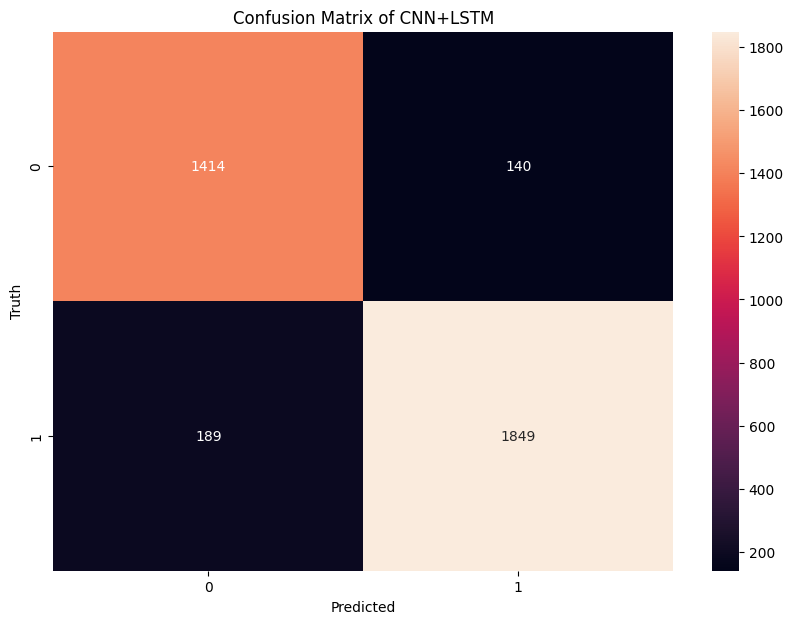


Classification Report of CNN+LSTM:
              precision    recall  f1-score   support

           0       0.88      0.91      0.90      1554
           1       0.93      0.91      0.92      2038

    accuracy                           0.91      3592
   macro avg       0.91      0.91      0.91      3592
weighted avg       0.91      0.91      0.91      3592



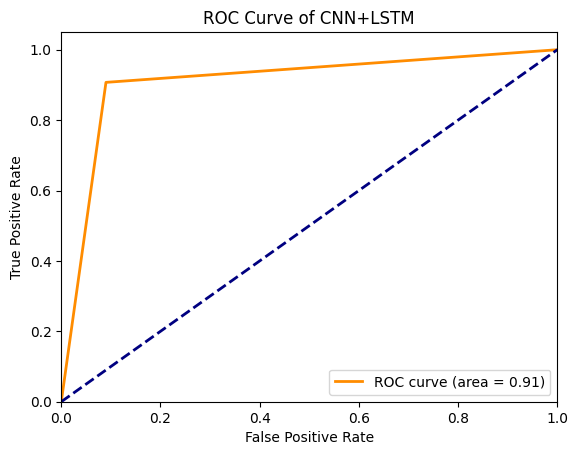

In [21]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.model_selection import validation_curve
import matplotlib.pyplot as plt
from keras.utils import to_categorical
import seaborn as sns

# Assuming `predicted_labels` are the predictions of our model on the test set
predicted_labels = cnn.predict(X_test)
predicted_labels = np.argmax(predicted_labels, axis=1)
true_labels = np.argmax(y_test, axis=1)  # Assuming y_test is our test labels
# Confusion Matrix
cm = confusion_matrix(true_labels, predicted_labels)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d')
plt.title("Confusion Matrix of CNN+LSTM")
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

# Classification Report
print("\nClassification Report of CNN+LSTM:")
print(classification_report(true_labels, predicted_labels))

# ROC Curve
fpr, tpr, _ = roc_curve(true_labels, predicted_labels)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of CNN+LSTM')
plt.legend(loc="lower right")
plt.show()

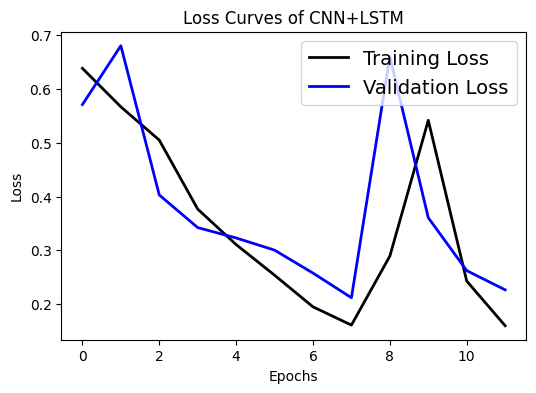

In [22]:
plt.figure(figsize=[6,4])
plt.plot(history.history['loss'], 'black', linewidth=2.0)
plt.plot(history.history['val_loss'], 'blue', linewidth=2.0)
plt.legend(['Training Loss', 'Validation Loss'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss', fontsize=10)
plt.title('Loss Curves of CNN+LSTM', fontsize=12)
plt.show()